# Testing Spectrogram and Melspectrogram

In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import librosa
import keras
from keras import backend as K
print keras.__version__
print 'Keras backend: ', keras.backend._BACKEND, ' and image dim ordering: ', keras.backend.image_dim_ordering()
import kapre

1.1.2
Keras backend:  tensorflow  and image dim ordering:  th


Using TensorFlow backend.


## Setup

In [2]:
len_src_set = 16000 * 5
n_dft = 1024
border_mode = 'same'
n_hop = n_dft / 3
n_filter = n_dft / 2 + 1
power = 1.0
dim_ordering = 'tf'
if dim_ordering == 'th':
    ch_axis_idx = 1
else:
    ch_axis_idx = 3
sr = 32000

## Test - STFT

In [3]:
src, sr = librosa.load('../srcs/bensound-cute.mp3', mono=False, duration=10.0, sr=sr)
src.shape

(2, 320000)

In [4]:
from kapre.TimeFrequency import Spectrogram
model = Sequential()
model.add(Spectrogram(n_dft=n_dft, n_hop=n_hop, input_shape=src.shape, power=2.0))

In [5]:
stft_per_channels = model.predict(src[np.newaxis, :, :])
stft_per_channels = librosa.logamplitude(stft_per_channels, ref_power=1.0)
print 'Shape of a batch (batch_size == 1 though): ', stft_per_channels.shape

Shape of a batch (batch_size == 1 though):  (1, 2, 513, 939)


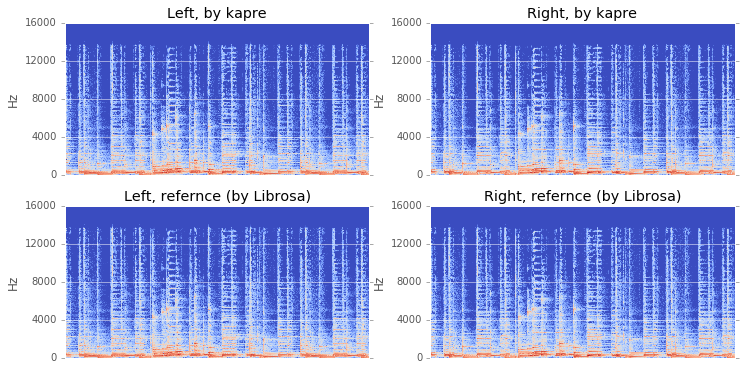

In [6]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
if K.image_dim_ordering() == 'th':
    stft_left = stft_per_channels[0, 0, :, :]
    stft_right = stft_per_channels[0, 1, :, :]
else:
    stft_left = stft_per_channels[0, :, :, 0]
    stft_right = stft_per_channels[0, :, :, 1]
librosa.display.specshow(stft_left, y_axis='linear', sr=sr)
plt.title('Left, by kapre')
plt.subplot(2, 2, 2)
librosa.display.specshow(stft_right, y_axis='linear', sr=sr)
plt.title('Right, by kapre')
plt.subplot(2, 2, 3)
stft_librosa_l = librosa.logamplitude(np.abs(librosa.stft(src[0], n_dft, n_hop))**2, ref_power=1.0)
stft_librosa_r = librosa.logamplitude(np.abs(librosa.stft(src[1], n_dft, n_hop))**2, ref_power=1.0)
librosa.display.specshow(stft_librosa_l, 
                         y_axis='linear', sr=sr)
plt.title('Left, refernce (by Librosa)')
plt.subplot(2, 2, 4)
librosa.display.specshow(stft_librosa_r, 
                         y_axis='linear', sr=sr)
plt.title('Right, refernce (by Librosa)')

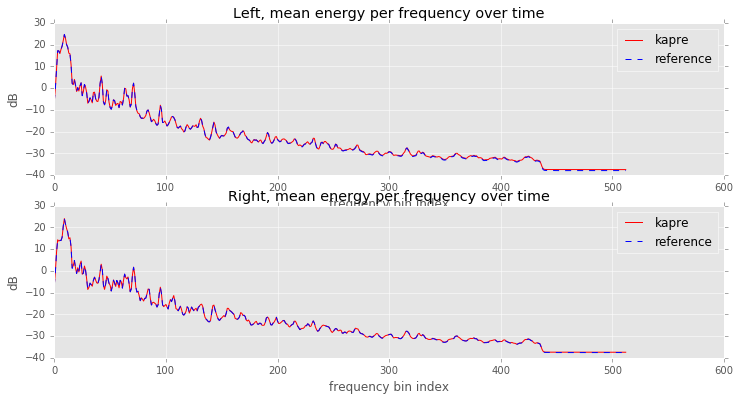

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(np.mean(stft_left, axis=1), '-', color='r', label='kapre')
plt.plot(np.mean(stft_librosa_l, axis=1), '--', color='b', label='reference')
plt.title('Left, mean energy per frequency over time')
plt.legend()
plt.xlabel('frequency bin index')
plt.ylabel('dB')
plt.subplot(2, 1, 2)
plt.plot(np.mean(stft_right, axis=1), '-', color='r', label='kapre')
plt.plot(np.mean(stft_librosa_r, axis=1), '--', color='b', label='reference')
plt.title('Right, mean energy per frequency over time')
plt.legend()
plt.xlabel('frequency bin index')
plt.ylabel('dB')

## Test - Melgram

In [8]:
from kapre.TimeFrequency import Melspectrogram
model = Sequential()
model.add(Melspectrogram(n_dft=n_dft, sr=sr, n_hop=n_hop, input_shape=src.shape, power=2.0))

In [9]:
melgrams = model.predict(src[np.newaxis, :, :])
melgrams = librosa.logamplitude(melgrams)
melgrams.shape

(1, 2, 128, 939)

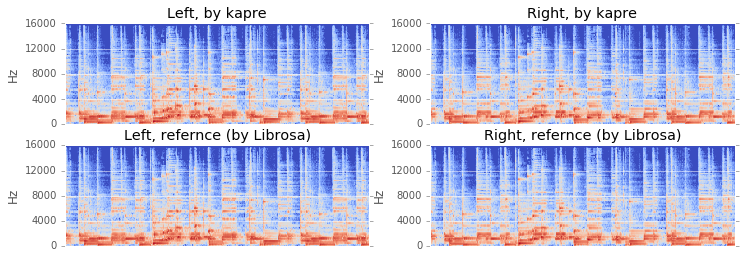

In [10]:
plt.figure(figsize=(12, 4))
plt.subplot(2, 2, 1)
if K.image_dim_ordering() == 'th':
    melgram_left = melgrams[0, 0, :, :]
    melgram_right = melgrams[0, 1, :, :]
else:
    melgram_left = melgrams[0, :, :, 0]
    melgram_right = melgrams[0, :, :, 1]
librosa.display.specshow(melgram_left, y_axis='linear', sr=sr)
plt.title('Left, by kapre')
plt.subplot(2, 2, 2)
librosa.display.specshow(melgram_right, y_axis='linear', sr=sr)
plt.title('Right, by kapre')

melgram_librosa_l = librosa.logamplitude(librosa.feature.melspectrogram(src[0], sr=sr, 
                                                                        n_fft=n_dft, 
                                                                        hop_length=n_hop))
melgram_librosa_r = librosa.logamplitude(librosa.feature.melspectrogram(src[1], sr=sr, 
                                                                        n_fft=n_dft, 
                                                                        hop_length=n_hop))
plt.subplot(2, 2, 3)
librosa.display.specshow(melgram_librosa_l, 
                         y_axis='linear', sr=sr)
plt.title('Left, refernce (by Librosa)')
plt.subplot(2, 2, 4)
librosa.display.specshow(melgram_librosa_r, 
                         y_axis='linear', sr=sr)
plt.title('Right, refernce (by Librosa)')

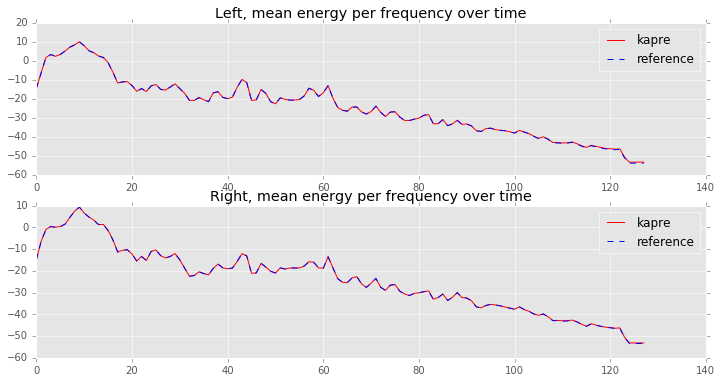

In [11]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(np.mean(melgram_left, axis=1), '-', color='r', label='kapre')
plt.plot(np.mean(melgram_librosa_l, axis=1), '--', color='b', label='reference')
plt.title('Left, mean energy per frequency over time')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(np.mean(melgram_right, axis=1), '-', color='r', label='kapre')
plt.plot(np.mean(melgram_librosa_r, axis=1), '--', color='b', label='reference')
plt.title('Right, mean energy per frequency over time')
plt.legend()